In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

from astropy.stats import sigma_clip
%matplotlib inline

In [2]:
def load_data(path, AOR):
    pathflux  = path + 'flux'  + AOR + '.npy'
    pathbg    = path + 'bg'    + AOR + '.npy'
    pathxdata = path + 'xdata' + AOR + '.npy'
    pathydata = path + 'ydata' + AOR + '.npy'
    pathpsfwx = path + 'psfwx' + AOR + '.npy'
    pathpsfwy = path + 'psfwy' + AOR + '.npy'
    pathbeta  = path + 'beta'  + AOR + '.npy'
    
    flux  = np.load(pathflux )
    bg    = np.load(pathbg   )
    xdata = np.load(pathxdata)
    ydata = np.load(pathydata)
    psfwx = np.load(pathpsfwx)
    psfwy = np.load(pathpsfwy)
    beta  = np.load(pathbeta )
    
    return flux, bg, xdata, ydata, psfwx, psfwy, beta 

In [3]:
def sigclip(data, sigma=4, iters=5):
    new_data = sigma_clip(data, sigma = 3, iters=5)
    return new_data

In [4]:
#AOR      = ['r57957888', 'r57958144', 'r57958400', 'r57958656', 'r57958912']
AOR      = ['r57958144', 'r57958400', 'r57958656']
datapath = 'C:/Users/Lisa/Documents/Exoplanets/high_precision_photometry/Plots/'

path = 'C:/Users/Lisa/Documents/Exoplanets/high_precision_photometry/Plots/Frame_Diag_Results.dat'

data1 = np.asarray(load_data(datapath, AOR[0]))
data2 = load_data(datapath, AOR[1])
data3 = load_data(datapath, AOR[2])
#data4 = load_data(datapath, AOR[3])
#data5 = load_data(datapath, AOR[4])

nb_data = [len(data1[0]), len(data2[0]), len(data3[0])]#, len(data4[0]), len(data5[0])]

data1 = np.where(np.isfinite(data1), data1, 99999)
data2 = np.where(np.isfinite(data2), data2, 99999)
data3 = np.where(np.isfinite(data3), data3, 99999)
#data4 = np.where(np.isfinite(data4), data4, 99999)
#data5 = np.where(np.isfinite(data5), data5, 99999)

flux  = [sigclip(data1[0]), sigclip(data2[0]), sigclip(data3[0])]#, sigclip(data4[0]), sigclip(data5[0])]
bg    = [sigclip(data1[1]), sigclip(data2[1]), sigclip(data3[1])]#, sigclip(data4[1]), sigclip(data5[1])]
xdata = [sigclip(data1[2]), sigclip(data2[2]), sigclip(data3[2])]#, sigclip(data4[2]), sigclip(data5[2])]
ydata = [sigclip(data1[3]), sigclip(data2[3]), sigclip(data3[3])]#, sigclip(data4[3]), sigclip(data5[3])]
psfwx = [sigclip(data1[4]), sigclip(data2[4]), sigclip(data3[4])]#, sigclip(data4[4]), sigclip(data5[4])]
psfwy = [sigclip(data1[5]), sigclip(data2[5]), sigclip(data3[5])]#, sigclip(data4[5]), sigclip(data5[5])]
beta  = [sigclip(data1[6]), sigclip(data2[6]), sigclip(data3[6])]#, sigclip(data4[6]), sigclip(data5[6])]

In [47]:
fluxval, bgval, xdataval, ydataval, psfwxval, psfwyval, betaval = np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), \
np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), np.empty((0,64))
fluxerr, bgerr, xdataerr, ydataerr, psfwxerr, psfwyerr, betaerr = np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), \
np.empty((0,64)), np.empty((0,64)), np.empty((0,64)), np.empty((0,64))

In [48]:
def get_stats(data, median_arr, std_arr):
    for i in range(3):
        median = np.median(data[i], axis = 0)
        std    = np.ma.std(data[i], axis = 0)
        median_arr = np.append(median_arr, [median], axis = 0)
        std_arr    = np.append(std_arr, [std], axis = 0)
    return median_arr, std_arr

In [49]:
fluxval , fluxerr = get_stats(flux , fluxval, fluxerr)
bgval   , bgerr   = get_stats(bg   , bgval,   bgerr  )
xdataval, xdataerr= get_stats(xdata, xdataval, xdataerr)
ydataval, ydataerr= get_stats(ydata, ydataval, ydataerr)
psfwxval, psfwxerr= get_stats(psfwx, psfwxval, psfwxerr)
psfwyval, psfwyerr= get_stats(psfwy, psfwyval, psfwyerr)
betaval , betaerr = get_stats(beta , betaval , betaerr)

In [52]:
bgval[0,:]

array([ 0.        ,  0.90361063,  0.89613071,  0.91434489,  0.93371335,
        0.96927247,  0.96574501,  0.98891222,  0.99725316,  0.99898004,
        0.99568127,  1.00446941,  1.02274117,  1.01498346,  1.01445777,
        1.02082376,  1.00435056,  1.02110932,  1.00712483,  1.01405413,
        1.0121713 ,  1.01901967,  1.01503942,  1.01618074,  1.01101899,
        0.99049552,  1.0137413 ,  1.00095682,  1.01722863,  1.01646059,
        1.00098318,  1.0028811 ,  1.01935352,  1.00689686,  1.00264698,
        0.99829148,  1.00092319,  1.00218683,  1.00506945,  1.00469175,
        0.99765275,  1.00900382,  0.99678977,  0.99300817,  0.99565043,
        0.99738479,  1.00351007,  0.99124967,  1.00210363,  0.99371953,
        0.99446354,  0.99810091,  0.98296303,  0.99607037,  0.99429232,
        1.01053411,  0.99625586,  0.98995806,  1.00255867,  0.99905171,
        0.99309028,  1.00011449,  0.98496635,  1.00704253])

In [59]:
bgmed = np.nanmedian(bg[0], axis = 0)
flux[0]

C:\Users\Lisa\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:769: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


masked_array(data =
 [[0.9935473983282285 0.999210610326471 0.994159430522634 ...,
  0.9979661419538229 1.0066526681540682 1.0010776428364634]
 [0.9841291128189817 1.002597978991423 1.0067502916682702 ...,
  0.9993823661054148 0.9959939202555611 0.9900526547309048]
 [1.0052511585553046 1.00904559297644 1.007414185997927 ...,
  0.9951729437227071 0.9989624159333662 0.9975768100994283]
 ..., 
 [0.9889640541508996 1.0030192554564774 1.0063049441044418 ...,
  1.0021172023333684 0.9884388035272719 1.0035227968597373]
 [0.9870949938015697 1.0115905674454546 1.0074801310369408 ...,
  0.9923930875204552 1.0005182608357013 0.9931085454804164]
 [1.0121504405953377 0.9870808011277017 1.008357246082866 ...,
  1.0019439451460388 0.9940225532475756 0.9981697701796988]],
             mask =
 [[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., Fals

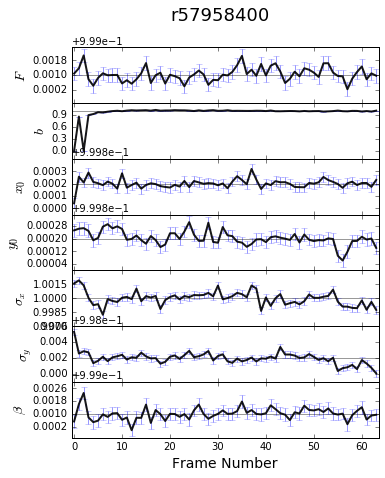

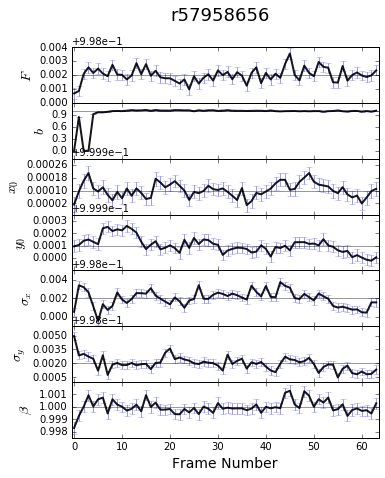

In [22]:
for i in range(3):
    nb = np.arange(64)
    fig, axes = plt.subplots(ncols=1, nrows=7, sharex=True, figsize=(5.5,7))
    fig.suptitle(str(AOR[i]), fontsize=18)
    
    axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)
    axes[6].axhline(y=1, color='k', alpha=0.4, linewidth=1)

    axes[0].errorbar(x = nb , y = fluxval[i,:] , yerr = fluxerr[i,:]/np.sqrt(nb_data[i]) , alpha=0.4, fmt='-.')
    axes[1].errorbar(x = nb , y = bgval[i,:]   , yerr = bgerr[i,:]/np.sqrt(nb_data[i])   , alpha=0.4, fmt='-.')
    axes[2].errorbar(x = nb , y = xdataval[i,:], yerr = xdataerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[3].errorbar(x = nb , y = ydataval[i,:], yerr = ydataerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[4].errorbar(x = nb , y = psfwxval[i,:], yerr = psfwyerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[5].errorbar(x = nb , y = psfwyval[i,:], yerr = psfwyerr[i,:]/np.sqrt(nb_data[i]), alpha=0.4, fmt='-.')
    axes[6].errorbar(x = nb , y = betaval[i,:] , yerr = betaerr[i,:]/np.sqrt(nb_data[i]) , alpha=0.4, fmt='-.')

    axes[0].plot(nb, fluxval[i,:] , color='k', linewidth=2, alpha=0.9)
    axes[1].plot(nb, bgval[i,:]   , color='k', linewidth=2, alpha=0.9)
    axes[2].plot(nb, xdataval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[3].plot(nb, ydataval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[4].plot(nb, psfwxval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[5].plot(nb, psfwyval[i,:], color='k', linewidth=2, alpha=0.9)
    axes[6].plot(nb, betaval[i,:] , color='k', linewidth=2, alpha=0.9)
    
    #axes[1].set_ylim(0.95,1.05)
    
    
    axes[0].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[1].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[2].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[3].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[4].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[5].yaxis.set_major_locator(MaxNLocator(5,prune='both'))
    axes[6].yaxis.set_major_locator(MaxNLocator(5,prune='both'))

    axes[0].set_ylabel(r'$F$', fontsize=14)
    axes[1].set_ylabel(r'$b$', fontsize=14)
    axes[2].set_ylabel(r'$x_0$', fontsize=14)
    axes[3].set_ylabel(r'$y_0$', fontsize=14)
    axes[4].set_ylabel(r'$\sigma _x$', fontsize=14)
    axes[5].set_ylabel(r'$\sigma _y$', fontsize=14)
    axes[6].set_ylabel(r'$\beta$', fontsize=14)

    axes[6].set_xlim(-0.5,63.5)
    axes[6].set_xlabel('Frame Number', fontsize=14)
    #fig.subplots_adjust(top=0.1)
    fig.subplots_adjust(hspace=0)
    plotpath = 'C:/Users/Lisa/Documents/Exoplanets/high_precision_photometry/Plots/Frame_Diagnostics_'+ AOR[i]+'.pdf'
    fig.savefig(plotpath, bbox_inches='tight')

In [12]:
flux_all = np.empty((0, 64))
for i in range(3):
    flux_all = np.append(flux_all, flux[i], axis = 0)
    flux_all = sigma_clip(flux_all, sigma=4, iters=5)
    
bg_all = np.empty((0, 64))
for i in range(3):
    bg_all = np.append(bg_all, bg[i], axis = 0)
    bg_all = np.where(np.isfinite(bg_all), bg_all, 99999)
    bg_all = sigma_clip(bg_all, sigma=2, iters=2)
    
xdata_all = np.empty((0, 64))
for i in range(3):
    xdata_all = np.append(xdata_all, xdata[i], axis = 0)
    xdata_all = sigma_clip(xdata_all, sigma=4, iters=5)

ydata_all = np.empty((0, 64))
for i in range(3):
    ydata_all = np.append(ydata_all, ydata[i], axis = 0)
    ydata_all = sigma_clip(ydata_all, sigma=4, iters=5)
    
psfwx_all = np.empty((0, 64))
for i in range(3):
    psfwx_all = np.append(psfwx_all, psfwx[i], axis = 0)
    psfwx_all = sigma_clip(psfwx_all, sigma=4, iters=5)

psfwy_all = np.empty((0, 64))
for i in range(3):
    psfwy_all = np.append(psfwy_all, psfwy[i], axis = 0)
    psfwy_all = sigma_clip(psfwy_all, sigma=4, iters=5)
    
beta_all = np.empty((0, 64))
for i in range(3):
    beta_all = np.append(beta_all, beta[i], axis = 0)
    beta_all = sigma_clip(beta_all, sigma=4, iters=5)
    

In [23]:
flux_med, flux_err = np.ma.median(flux_all, axis = 0), np.std(flux_all, axis = 0)/1374
bg_med, bg_err = np.ma.median(bg_all, axis = 0), np.std(bg_all, axis = 0)/1374
xdata_med, xdata_err = np.median(xdata_all, axis = 0), np.std(xdata_all, axis = 0)/1374
ydata_med, ydata_err = np.median(ydata_all, axis = 0), np.std(ydata_all, axis = 0)/1374
psfwx_med, psfwx_err = np.median(psfwx_all, axis = 0), np.std(psfwx_all, axis = 0)/1374
psfwy_med, psfwy_err = np.median(psfwy_all, axis = 0), np.std(psfwy_all, axis = 0)/1374
beta_med, beta_err = np.median(beta_all, axis = 0), np.std(beta_all, axis = 0)/1374

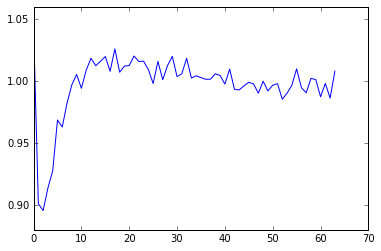

In [43]:
bgall = np.concatenate((bg[0], bg[1], bg[2]), axis=0)

bgmed, bgstd = np.ma.median(bg[1], axis = 0), np.ma.std(bgall, axis = 0)
plt.plot(bgmed)

In [24]:
nb = np.arange(64)
fig, axes = plt.subplots(ncols=1, nrows=7, sharex=True, figsize=(5.5,7))
    
axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[6].axhline(y=1, color='k', alpha=0.4, linewidth=1)

axes[0].errorbar(x = nb , y = flux_med, yerr = flux_err , alpha=0.4, fmt='-.')
axes[1].errorbar(x = nb , y = bg_med, yerr = bg_err   , alpha=0.4, fmt='-.')
axes[2].errorbar(x = nb , y = xdata_med, yerr = xdata_err, alpha=0.4, fmt='-.')
axes[3].errorbar(x = nb , y = ydata_med, yerr = ydata_err, alpha=0.4, fmt='-.')
axes[4].errorbar(x = nb , y = psfwx_med, yerr = psfwy_err, alpha=0.4, fmt='-.')
axes[5].errorbar(x = nb , y = psfwy_med, yerr = psfwy_err, alpha=0.4, fmt='-.')
axes[6].errorbar(x = nb , y = beta_med, yerr = beta_err , alpha=0.4, fmt='-.')

axes[0].plot(nb, flux_med, color='k', linewidth=1, alpha=0.9)
axes[1].plot(nb, bg_med, color='k', linewidth=1, alpha=0.9)
axes[2].plot(nb, xdata_med, color='k', linewidth=1, alpha=0.9)
axes[3].plot(nb, ydata_med, color='k', linewidth=1, alpha=0.9)
axes[4].plot(nb, psfwx_med, color='k', linewidth=1, alpha=0.9)
axes[5].plot(nb, psfwy_med, color='k', linewidth=1, alpha=0.9)
axes[6].plot(nb, beta_med, color='k', linewidth=1, alpha=0.9)
    
    
axes[0].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[1].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[2].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[3].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[4].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[5].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[6].yaxis.set_major_locator(MaxNLocator(4,prune='both'))

axes[0].set_ylabel(r'$F$', fontsize=14)
axes[1].set_ylabel(r'$b$', fontsize=14)
axes[2].set_ylabel(r'$x_0$', fontsize=14)
axes[3].set_ylabel(r'$y_0$', fontsize=14)
axes[4].set_ylabel(r'$\sigma _x$', fontsize=14)
axes[5].set_ylabel(r'$\sigma _y$', fontsize=14)
axes[6].set_ylabel(r'$\beta$', fontsize=14)

axes[6].set_xlim(-0.5,63.5)
axes[6].set_xlabel('Frame Number', fontsize=14)
#fig.subplots_adjust(top=0.1)
fig.subplots_adjust(hspace=0)
plotpath = 'C:/Users/Lisa/Documents/Exoplanets/high_precision_photometry/Plots/Frame_Diagnostics2.pdf'
fig.savefig(plotpath, bbox_inches='tight')

In [54]:
meanflux, sigmaflux = np.median(flux_med), np.std(flux_med)
meanbg, sigmabg = np.median(bg_med), np.std(bg_med)
meanxdata, sigmaxdata = np.median(xdata_med), np.std(xdata_med)
meanydata, sigmaydata = np.median(ydata_med), np.std(ydata_med)
meanpsfwx, sigmapsfwx = np.median(psfwx_med), np.std(psfwx_med)
meanpsfwy, sigmapsfwy = np.median(psfwy_med), np.std(psfwy_med)
meanbeta, sigmabeta = np.median(beta_med), np.std(beta_med)

flag = False
while(flag == False):
    index = np.where(flux_med < (meanflux - 3*sigmaflux))
    np.append(index, np.where(flux_med > (meanflux + 3*sigmaflux)))
    sigmaflux2 = np.std(np.delete(flux_med, index))
    flag = (sigmaflux2 == sigmaflux)
    sigmaflux = sigmaflux2


flag = False
while(flag == False):
    index = np.where(bg_med < (meanbg - 3*sigmabg))
    np.append(index, np.where(bg_med > (meanbg + 3*sigmabg)))
    sigmabg2 = np.std(np.delete(bg_med, index))
    flag = (sigmabg2 == sigmabg)
    sigmabg = sigmabg2
    
flag = False
while(flag == False):
    index = np.where(xdata_med < (meanxdata - 3*sigmaxdata))
    np.append(index, np.where(xdata_med > (meanxdata + 3*sigmaxdata)))
    sigmaxdata2 = np.std(np.delete(xdata_med, index))
    flag = (sigmaxdata2 == sigmaxdata)
    sigmaxdata = sigmaxdata2
    
flag = False
while(flag == False):
    index = np.where(ydata_med < (meanydata - 3*sigmaydata))
    np.append(index, np.where(ydata_med > (meanydata + 3*sigmaydata)))
    sigmaydata2 = np.std(np.delete(ydata_med, index))
    flag = (sigmaydata2 == sigmaydata)
    sigmaydata = sigmaydata2

flag = False
while(flag == False):
    index = np.where(psfwx_med < (meanpsfwx - 3*sigmapsfwx))
    np.append(index, np.where(psfwx_med > (meanpsfwx + 3*sigmapsfwx)))
    sigmapsfwx2 = np.std(np.delete(psfwx_med, index))
    flag = (sigmapsfwx2 == sigmapsfwx)
    sigmapsfwx = sigmapsfwx2
    
flag = False
while(flag == False):
    index = np.where(psfwy_med < (meanpsfwy - 3*sigmapsfwy))
    np.append(index, np.where(psfwy_med > (meanpsfwy + 3*sigmapsfwy)))
    sigmapsfwy2 = np.std(np.delete(psfwy_med, index))
    flag = (sigmapsfwy2 == sigmapsfwy)
    sigmapsfwy = sigmapsfwy2
    
flag = False
while(flag == False):
    index = np.where(beta_med < (meanbeta - 3*sigmabeta))
    np.append(index, np.where(beta_med > (meanbeta + 3*sigmabeta)))
    sigmabeta2 = np.std(np.delete(beta_med, index))
    flag = (sigmabeta2 == sigmabeta)
    sigmabeta = sigmabeta2

In [18]:
np.where(np.isnan(bg_all))

(array([], dtype=int64), array([], dtype=int64))

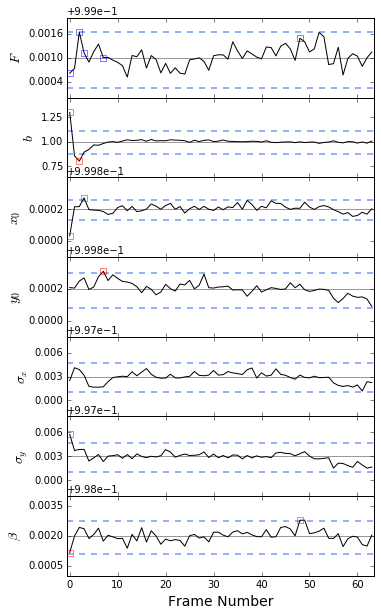

In [55]:
nb = np.arange(64)
fig, axes = plt.subplots(ncols=1, nrows=7, sharex=True, figsize=(5.5,10))

axes[0].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[1].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[2].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[3].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[4].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[5].axhline(y=1, color='k', alpha=0.4, linewidth=1)
axes[6].axhline(y=1, color='k', alpha=0.4, linewidth=1)

axes[0].axhline(y= 1 + 2.5*sigmaflux , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[1].axhline(y= 1 + 2.5*sigmabg , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[2].axhline(y= 1 + 2.5*sigmaxdata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[3].axhline(y= 1 + 2.5*sigmaydata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[4].axhline(y= 1 + 2.5*sigmapsfwx, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[5].axhline(y= 1 + 2.5*sigmapsfwy, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[6].axhline(y= 1 + 2.5*sigmabeta , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')

axes[0].axhline(y= 1 - 3*sigmaflux , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[1].axhline(y= 1 - 3*sigmabg   , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[2].axhline(y= 1 - 3*sigmaxdata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[3].axhline(y= 1 - 3*sigmaydata, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[4].axhline(y= 1 - 3*sigmapsfwx, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[5].axhline(y= 1 - 3*sigmapsfwy, color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')
axes[6].axhline(y= 1 - 3*sigmabeta , color='#6495ED', alpha=0.7, linewidth=2, linestyle = 'dashed')

axes[0].plot(nb, flux_med , 'k', mec ='b', marker='s', markevery=[0,2,3,7,48],fillstyle='none')
axes[1].plot(nb, bg_med   , 'k', mec ='r', marker='s', markevery=[0,2],fillstyle='none')
axes[2].plot(nb, xdata_med, 'k', mec ='r', marker='s', markevery=[0,3],fillstyle='none')
axes[3].plot(nb, ydata_med, 'k', mec ='r', marker='s', markevery=[7],fillstyle='none')
axes[4].plot(nb, psfwx_med, 'k', mec ='r', marker='s', markevery=[],fillstyle='none')
axes[5].plot(nb, psfwy_med, 'k', mec ='r', marker='s', markevery=[0],fillstyle='none')
axes[6].plot(nb, beta_med , 'k', mec ='r', marker='s', markevery=[0, 48],fillstyle='none')

#axes[0].set_ylim(0.99, 1.01)
axes[0].set_ylim(0.999, 1.001)
axes[1].set_ylim(0.64,1.45)
axes[2].set_ylim(0.9997, 1.0002)
axes[3].set_ylim(0.9997, 1.0002)
axes[4].set_ylim(0.995, 1.005)
axes[5].set_ylim(0.995, 1.005)
axes[6].set_ylim(0.998, 1.002)

axes[0].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[1].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[2].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[3].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[4].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[5].yaxis.set_major_locator(MaxNLocator(4,prune='both'))
axes[6].yaxis.set_major_locator(MaxNLocator(4,prune='both'))

axes[0].set_ylabel(r'$F$', fontsize=14)
axes[1].set_ylabel(r'$b$', fontsize=14)
axes[2].set_ylabel(r'$x_0$', fontsize=14)
axes[3].set_ylabel(r'$y_0$', fontsize=14)
axes[4].set_ylabel(r'$\sigma _x$', fontsize=14)
axes[5].set_ylabel(r'$\sigma _y$', fontsize=14)
axes[6].set_ylabel(r'$\beta$', fontsize=14)

#axes[0].plot(nb,flux,color='k', mec ='b', marker='s', markevery=[0],fillstyle='none')

axes[6].set_xlim(-0.5,63.5)
axes[6].set_xlabel('Frame Number', fontsize=14)
fig.subplots_adjust(hspace=0)
plotpath = 'C:/Users/Lisa/Documents/Exoplanets/high_precision_photometry/Plots/Frame_Diagnostics1.pdf'
fig.savefig(plotpath, bbox_inches='tight')

In [ ]:
'''blue  represent frames exhibiting unsually psf metric or background flux with usable photometry
   red  repre'''